In [42]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import math 


In [107]:
args = {'kerr': 0.003* 2 * np.pi,  #MHz
        'n_max': 10,
        'omega': 0.5 * 2 * np.pi,  #MHz
        }

In [108]:
def P_0(alpha, t , args):
    return np.abs(np.exp(-np.abs(alpha)**2) *
                    np.sum([np.abs(alpha)**(2*n)/math.factorial(n) * np.exp(-1j * (-1 * args['kerr']/2* n**2 + args['omega'] *n) * t) for n in range(0, args['n_max'])])
                    )**2

In [109]:
a = qt.destroy(args['n_max'])
adag = a.dag()

H = args['kerr'] * adag * adag * a * a + args['omega'] * adag * a

def probability(alpha, t, args):
    n_op = adag * a
    psi = qt.displace(args['n_max'], -1 * alpha) * ((-1.0j * H * t).expm()) * qt.displace(args['n_max'], alpha) * qt.basis(args['n_max'], 0)
    rho = qt.ket2dm(psi)
    parity_op = (-1j * np.pi * n_op).expm()
    return np.abs((parity_op * rho).tr())


In [110]:
import mpmath

# Set the desired precision (number of digits)
mpmath.mp.dps = 20  # For example, 50 digits of precision

# Compute the factorial of a large number
large_number_factorial = 1/mpmath.fac(10)  # Example: factorial of 100

# Print or use the result
print(large_number_factorial)

2.7557319223985890653e-7


In [111]:
import math
1/math.factorial(10)

2.755731922398589e-07

In [112]:
2**(20)

1048576

In [113]:
probability(1, 1, args)

np.float64(0.031030307097420634)

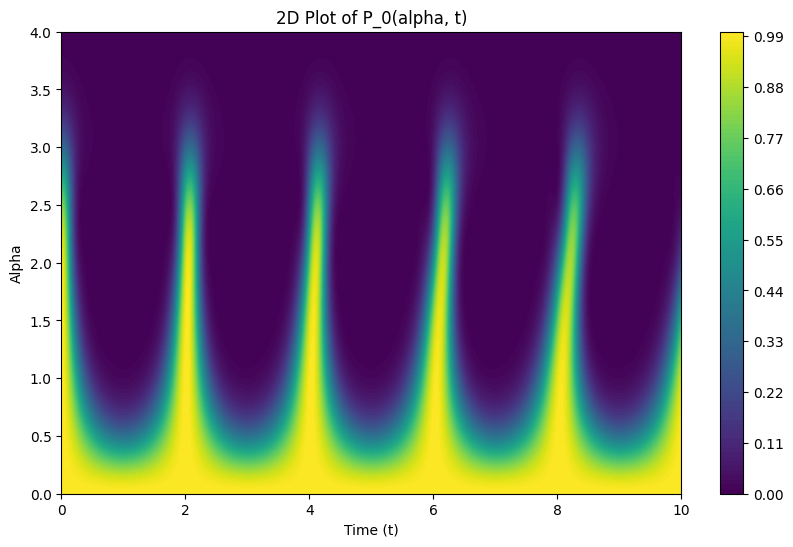

In [114]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming tlist and alpha_list are defined as per your excerpt
tlist = np.linspace(0, 10, 1000)
alpha_list = np.linspace(0, 4, 100)

# Example P_0 function (replace this with your actual function)
# def P_0(alpha, t):
#     return np.exp(-alpha * t)  # Example function, replace with actual computation

# Compute z-values
Z = np.zeros((len(alpha_list), len(tlist)))
for i, alpha in enumerate(alpha_list):
    for j, t in enumerate(tlist):
        #Z[i, j] = P_0(alpha, t, args)
        Z[i, j] = P_0(alpha, t, args)

# Create the plot
plt.figure(figsize=(10, 6))
contour = plt.contourf(tlist, alpha_list, Z, levels=100, cmap='viridis')
plt.colorbar(contour)
plt.xlabel('Time (t)')
plt.ylabel('Alpha')
plt.title('2D Plot of P_0(alpha, t)')
plt.show()

In [104]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming tlist and alpha_list are defined as per your excerpt
tlist = np.linspace(0, 10, 1000)
alpha_list = np.linspace(0, 3, 100)

# Example P_0 function (replace this with your actual function)
# def P_0(alpha, t):
#     return np.exp(-alpha * t)  # Example function, replace with actual computation

# Compute z-values
Z = np.zeros((len(alpha_list), len(tlist)))
for i, alpha in enumerate(alpha_list):
    for j, t in enumerate(tlist):
        #Z[i, j] = P_0(alpha, t, args)
        Z[i, j] = probability(alpha, t, args)

# Create the plot
plt.figure(figsize=(10, 6))
contour = plt.contourf(tlist, alpha_list, Z, levels=100, cmap='viridis')
plt.colorbar(contour)
plt.xlabel('Time (t)')
plt.ylabel('Alpha')
plt.title('2D Plot of P_0(alpha, t)')
plt.show()

KeyboardInterrupt: 

In [52]:
np.math

AttributeError: module 'numpy' has no attribute 'math'

In [53]:
chi = 0.3 
1/chi/2/np.pi

0.5305164769729845